# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [4]:
def integer_spiral_numpy(n):
    if n % 2 == 0:
        raise ValueError("N musi byt liche")
    
    A = np.zeros((n + 2, n + 2))

    mid = n//2 + 1
    position = 1

    A[mid, mid] = position 
    position += 1
    

    for i in range(mid):
        first = mid - i
        last = mid + i
        move = last - first + 1

        A[last, first + 1:last + 2] = np.arange(position, position + move)    # vpravo
        position += move

        A[first - 1:last, last + 1] = np.arange(position, position + move)[::-1]    # nahoru 
        position += move
       
        first -= 1
        last += 1 
        move = last - first

        A[first, first:last] = np.arange(position, position + move)[::-1]    # vlevo
        position += move

        A[first + 1:last + 1, first] = np.arange(position, position + move)    # dolu 
        position += move
    
    return A[1:-1, 1:-1]  

In [5]:
print(integer_spiral_numpy(7))

%timeit integer_spiral(101)
%timeit integer_spiral_numpy(101)

%timeit integer_spiral(1001)
%timeit integer_spiral_numpy(1001)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]
27 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
848 μs ± 391 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.79 s ± 470 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.7 ms ± 879 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
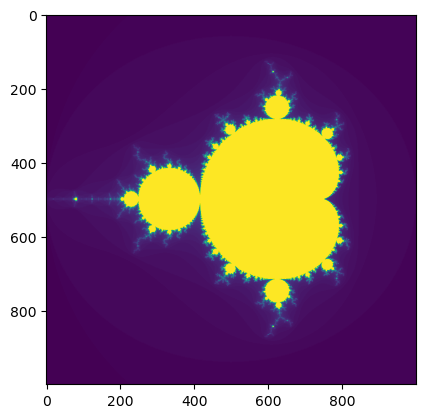

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, v kolikáté iteraci $k$ se stalo, že $|z_i| > 2$ (jakmile toto nastane jednou, už to bude platit pro všechna $n > i$)
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [6]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    X, Y = np.mgrid[x_min:x_max:n * 1j, y_min:y_max:n * 1j]
    C = X + Y * 1j 

    Z = np.zeros_like(C)
    divergence_matrix = np.zeros(C.shape)
    
    mask = np.ones(C.shape, dtype=bool)

    for i in range(k):
        Z[mask] = Z[mask] ** 2 + C[mask]    

        mask2 = np.abs(Z) <= 2    

        divergence_matrix[mask & ~mask2] = i       
        mask &= mask2                              

    return divergence_matrix

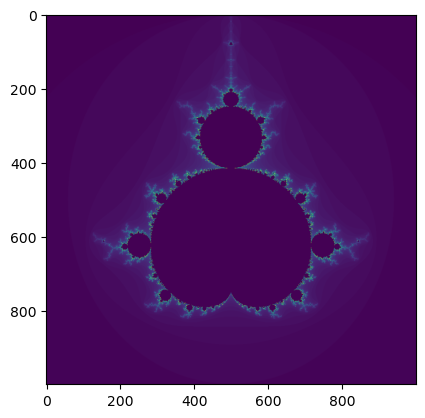

In [7]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral).